In [1]:
# Install datacommons_pandas
! pip install datacommons_pandas --upgrade --quiet
# Import Data Commons
import datacommons_pandas as dc

# Import other required libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

import json

In [6]:
# In the browser, we saw that the dcid for United States is country/USA
country = 'country/DEU'

In [7]:
# Get lists of states, counties, and cities within Country, respectively.
states = dc.get_places_in([country], 'State')[country]
counties = dc.get_places_in([country], 'County')[country]
cities = dc.get_places_in([country], 'City')[country]

In [12]:
# Display the first 10 states
cities[:10]

['nuts/DE111',
 'nuts/DE117',
 'nuts/DE121',
 'nuts/DE122',
 'nuts/DE125',
 'nuts/DE126',
 'nuts/DE129',
 'nuts/DE131',
 'nuts/DE144',
 'nuts/DE211']

In [22]:

# Get StatVarObservations for cities.
df_city = dc.build_multivariate_dataframe(cities, ['Count_Person', 'Median_Age_Person'])
df_city.head(10)

,Count_Person
place,
nuts/DE111,613392
nuts/DE122,297488
nuts/DE125,149633
nuts/DE126,314931
nuts/DE131,229144
nuts/DE144,123672
nuts/DE211,138716
nuts/DE212,1378176
nuts/DE221,71193


In [15]:
def add_name_col(df):
  # Add a new column called name, where each value is the name for the place dcid in the index.
  df['name'] = df.index.map(dc.get_property_values(df.index, 'name'))
  
  # Keep just the first name, instead of a list of all names.
  df['name'] = df['name'].str[0]

In [23]:
add_name_col(df_city)
df_city.head()

,Count_Person,name
place,,
nuts/DE111,613392,Stuttgart
nuts/DE122,297488,Karlsruhe
nuts/DE125,149633,Heidelberg
nuts/DE126,314931,Mannheim
nuts/DE131,229144,Freiburg im Breisgau


In [24]:
df_city = df_city[df_city['Count_Person'] > 1]
df_city.head(10)

,Count_Person,name
place,,
nuts/DE111,613392,Stuttgart
nuts/DE122,297488,Karlsruhe
nuts/DE125,149633,Heidelberg
nuts/DE126,314931,Mannheim
nuts/DE131,229144,Freiburg im Breisgau
nuts/DE144,123672,Ulm
nuts/DE211,138716,Ingolstadt
nuts/DE212,1378176,Munich
nuts/DE221,71193,Landshut


In [28]:
def plot_data(title, pd_table):
  """ Generate a scatter plot comparing median age and population count. """
  plt.figure(figsize=(12, 8))
  plt.title(title)
  plt.xlabel('name')
  plt.ylabel('Population Count (log scale)')
  
  # Scatter plot the information
  ax = plt.gca()
  ax.set_yscale('log')
  ax.scatter(pd_table['name'], pd_table['Count_Person'], alpha=0.7)

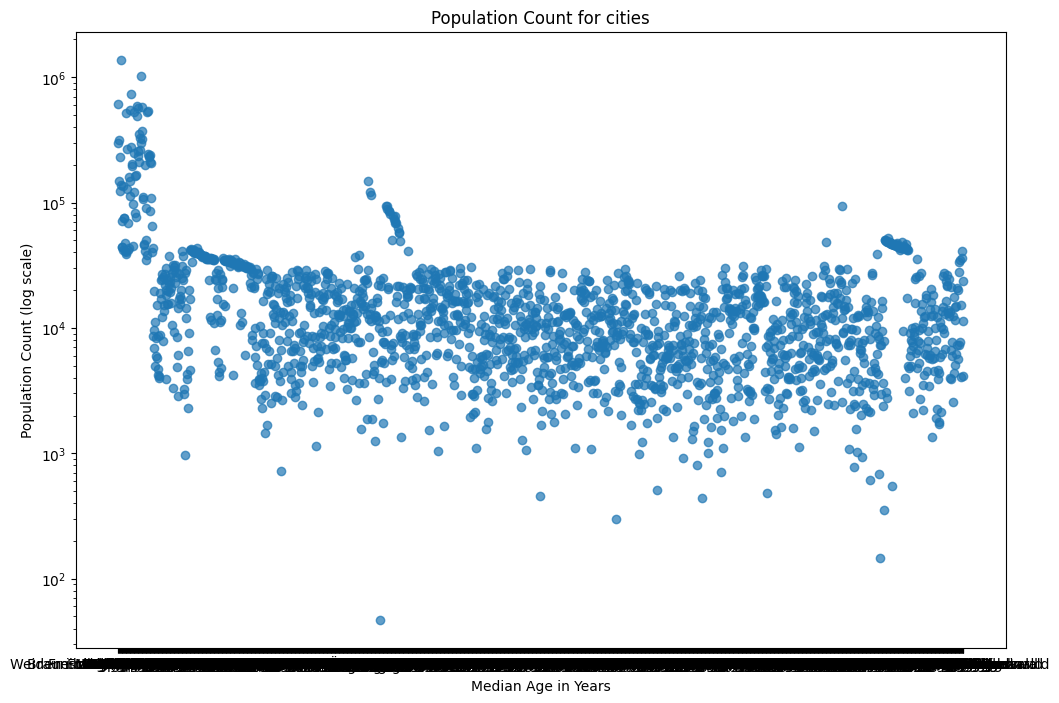

In [30]:
# Generate the plot for state data
plot_data('Population Count for cities', df_city)